In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df= pd.read_csv('diabetes.csv')
df.head()

,Age,Gender,Polydipsia,Blurred Vision,Chest pain,Polyphagia,Poor wound healing,Swelling in legs and feet,Dizzines,Polyuria,Fatigue,Joint Pain,Abdominal Pain,Nausea & Vomiting,Swollen abdomen,Memory loss,Difficult concentrating,Muscle Pain,Sore throat,Diabetes
0,57,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,1
1,54,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,1
2,42,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,0,1
3,49,0,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1
4,50,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        499 non-null    int64
 1   Gender                     499 non-null    int64
 2   Polydipsia                 499 non-null    int64
 3   Blurred Vision             499 non-null    int64
 4   Chest pain                 499 non-null    int64
 5   Polyphagia                 499 non-null    int64
 6   Poor wound healing         499 non-null    int64
 7   Swelling in legs and feet  499 non-null    int64
 8   Dizzines                   499 non-null    int64
 9   Polyuria                   499 non-null    int64
 10  Fatigue                    499 non-null    int64
 11  Joint Pain                 499 non-null    int64
 12  Abdominal Pain             499 non-null    int64
 13  Nausea & Vomiting          499 non-null    int64
 14  Swollen abdomen           

In [4]:
df.describe()

,Age,Gender,Polydipsia,Blurred Vision,Chest pain,Polyphagia,Poor wound healing,Swelling in legs and feet,Dizzines,Polyuria,Fatigue,Joint Pain,Abdominal Pain,Nausea & Vomiting,Swollen abdomen,Memory loss,Difficult concentrating,Muscle Pain,Sore throat,Diabetes
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,47.839679,0.380762,0.517034,0.537074,0.545090,0.533066,0.478958,0.529058,0.509018,0.571142,0.521042,0.539078,0.523046,0.496994,0.525050,0.498998,0.503006,0.482966,0.490982,0.967936
std,12.254429,0.486061,0.500211,0.499124,0.498462,0.499406,0.500058,0.499656,0.500420,0.495410,0.500058,0.498971,0.499970,0.500493,0.499873,0.500501,0.500493,0.500211,0.500420,0.176347
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,47.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

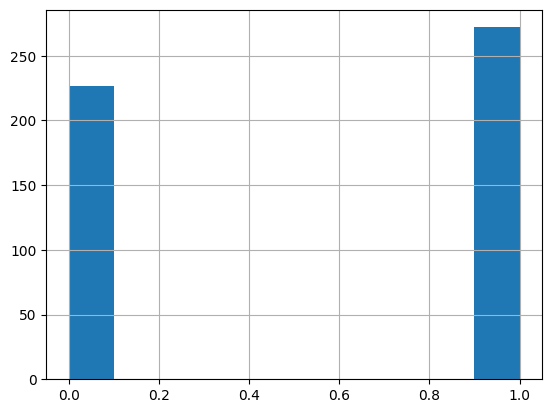

In [6]:
df['Chest pain'].hist()

<Axes: >

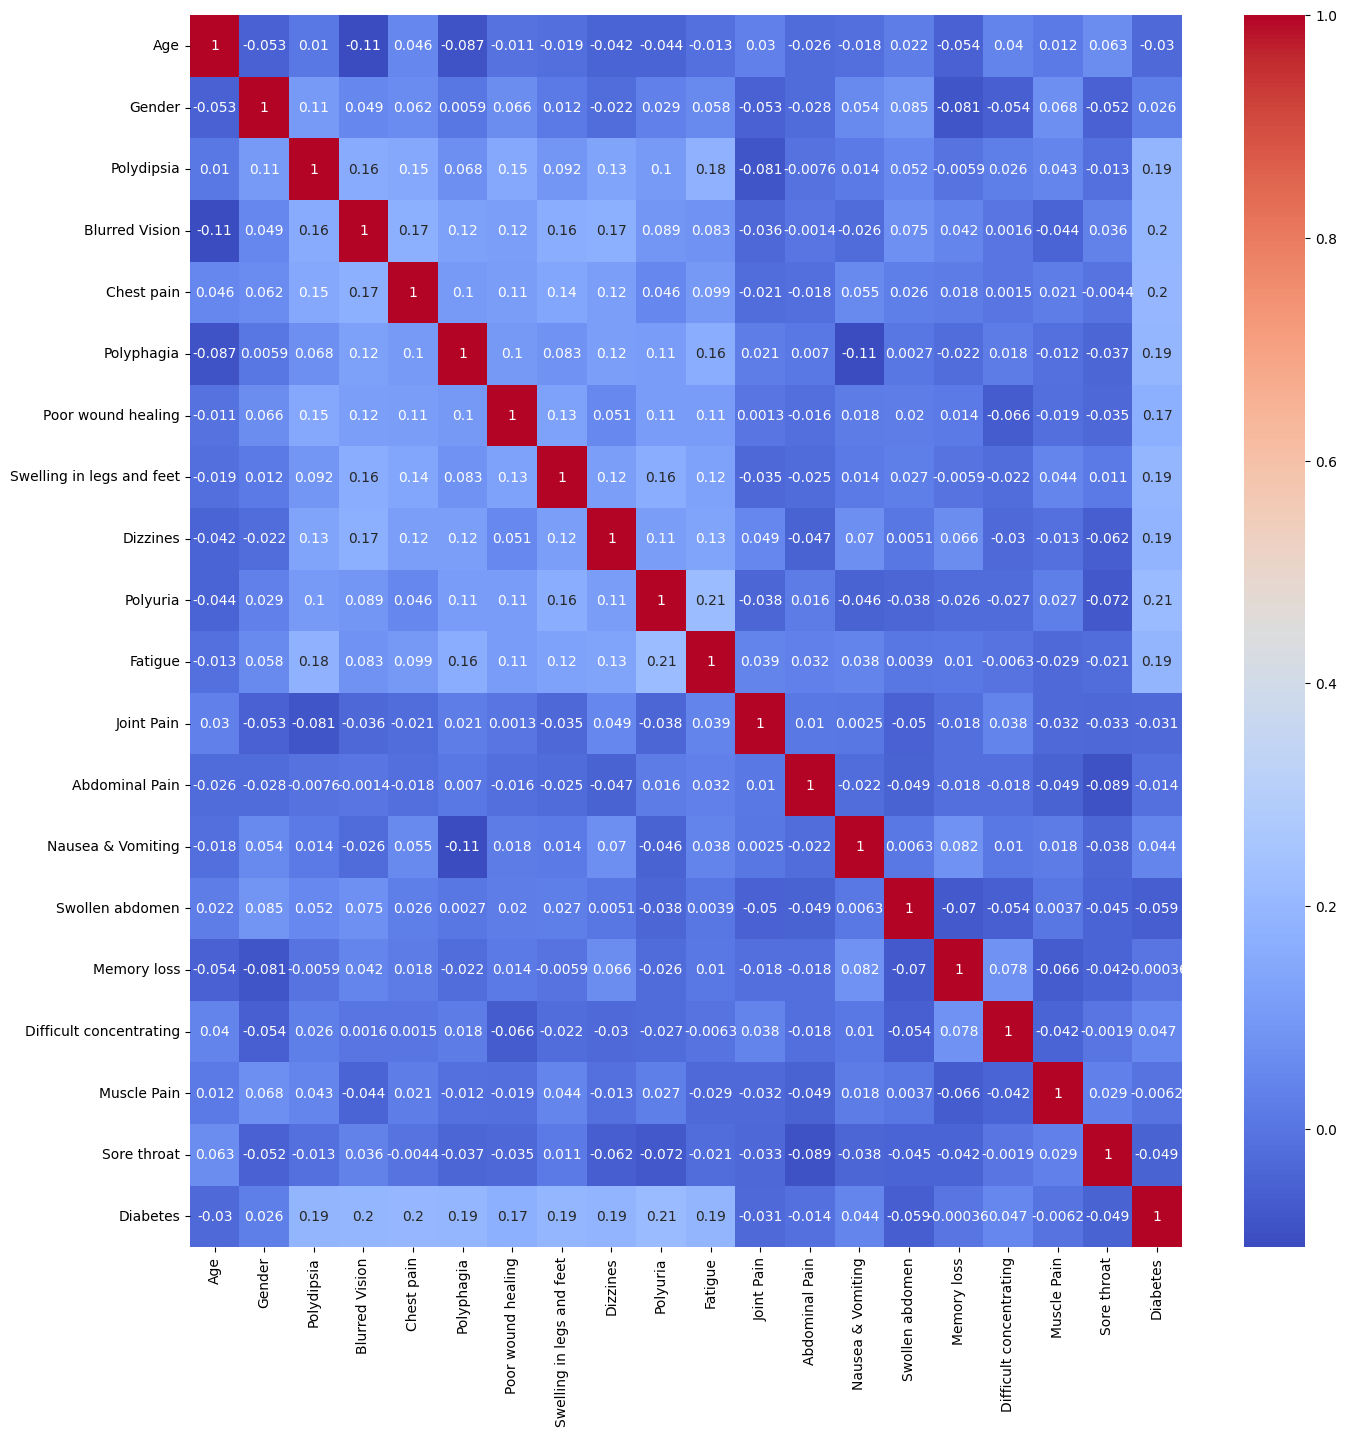

In [8]:
import seaborn as sns
columns = df.select_dtypes(include=np.number)
corr= columns.corr()
fig,ax=plt.subplots(figsize=(16,16))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [9]:
x=df.drop(columns=['Diabetes'])
y=df['Diabetes']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
# prediction=model.predict(x_test)
# print(prediction)
print('Accuracy of Model is: ', model.score(x_test, y_test )*100)

Accuracy of Model is:  98.66666666666667


In [12]:
import pickle

with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [13]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)
    